### Import Necessary Packages

In [10]:
import pandas as pd
from pronto_utils import download_if_needed
import matplotlib.pyplot as plt
import numpy
%matplotlib inline

### Download Necessary Data

In [11]:
download_if_needed('https://data.seattle.gov/resource/4xy5-26gy.csv',filename='bike_data.csv')
download_if_needed('https://raw.githubusercontent.com/UWSEDS/homework_data/master/weather_data.csv?token=AGL1-mlvl0B-0kLT86lRXBgcGha9E60Tks5Wn-cVwA%3D%3D',filename='weather_data.csv')

File bike_data.csv already exists; not downloading
File weather_data.csv already exists; not downloading


### Read in Bike and Weather Data to Pandas Dataframe

In [28]:
bike_data = pd.read_csv('bike_data.csv')
weather_data = pd.read_csv('weather_data.csv',parse_dates=[2])

### Only Look at 2015 Bike Data. Convert date to datetime form and save as new column. Extract the hour and date from the datetime column.

In [48]:
bike_data['datetime'] = pd.to_datetime(bike_data['date'])
bike_2015 = bike_data[bike_data.datetime.dt.year==2015]
bike_2015['hour'] = bike_2015.datetime.dt.hour
bike_2015['date'] = bike_2015.datetime.dt.date

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Sum up the total number of NB bike rides and SB bike rides for each hour.

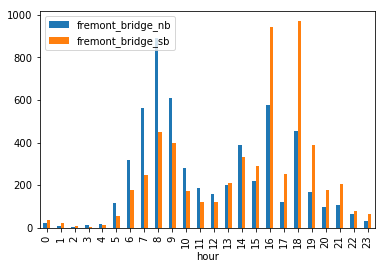

In [49]:
grouped = bike_2015.groupby('hour').sum()[['fremont_bridge_nb','fremont_bridge_sb']]
grouped.plot(kind='bar')

### Explore the average number of rides per hour for both NB and SB.

In [50]:
grouped_averages = bike_2015.groupby('hour').mean()[['fremont_bridge_nb','fremont_bridge_sb']]
grouped_averages.head()

,fremont_bridge_nb,fremont_bridge_sb
hour,,
0,2.888889,4.444444
1,0.909091,2.000000
2,0.333333,0.750000
3,1.500000,0.400000
4,1.800000,1.200000


### Only Look at 2015 Data for Weather. Set the date column to be the index. 

In [51]:
weather_2015 = weather_data[weather_data.DATE.dt.year==2015]
weather_2015 = weather_2015.set_index('DATE')

### Explore the precipiation and temperature values for the year. The temperature values look odd.

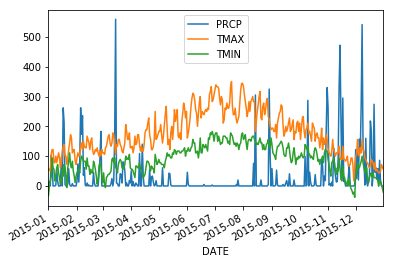

In [53]:
weather_2015[['PRCP','TMAX','TMIN']].plot()

### Re-read in the bike_data in with dates parsed.

In [35]:
bike_data=pd.read_csv('bike_data.csv',parse_dates=[0])

### Only Look at 2015 Data for Bikes. Set the date column to be the index. 

In [56]:
bike_2015 = bike_data[bike_data.date.dt.year==2015]
bike_2015 = bike_2015.set_index('date')

### Calculate total number of bike rides per day.

In [58]:
bike_2015_sums = bike_2015.resample('D').sum()
bike_2015_sums.head()

,fremont_bridge_nb,fremont_bridge_sb
date,,
2015-11-08,0.0,0.0
2015-11-09,NaN,NaN
2015-11-10,0.0,0.0
2015-11-11,NaN,NaN
2015-11-12,NaN,NaN


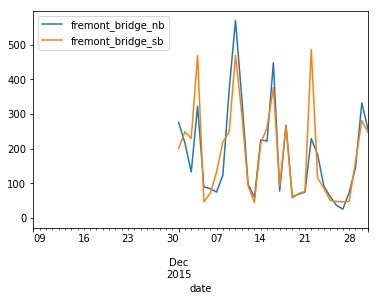

In [59]:
bike_2015_sums.plot()

### Join the weather data to the bike data.

In [60]:
bike_and_weather = weather_2015.join(bike_2015_sums,how='right')

### Calculate a total rides column.

In [61]:
bike_and_weather['total_rides'] = bike_and_weather['fremont_bridge_nb']+bike_and_weather['fremont_bridge_sb']

### The number of bike rides in 2015 is 0 before December. For a useful plot, only show the month of December.

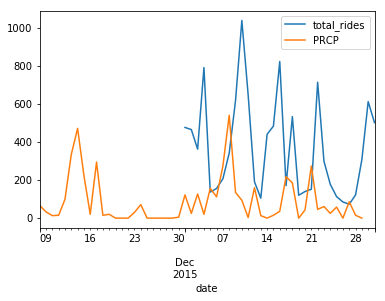

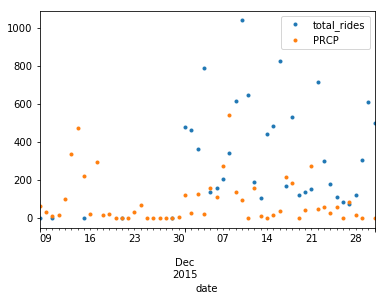

In [62]:
december_data = bike_and_weather[bike_and_weather.index.month==12]
december_data[['total_rides','PRCP']].plot()
december_data[['total_rides','PRCP']].plot(style=".")